In [1]:
import tensorflow as tf
import numpy as np
import glob
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import dcgan_model
import dcgan_utils
import dcgan_ops
import celebA_estimators

# Sample from the generator
---

In [2]:
# define the graph
sess = tf.Session()
z = tf.placeholder(tf.float32, shape=[64, 100], name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

Instructions for updating:
Please use tf.global_variables instead.


In [3]:
# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

In [4]:
# generate images
feed_dict = {z : np.random.randn(64, 100)}
x_hat_val = sess.run(x_hat, feed_dict=feed_dict)

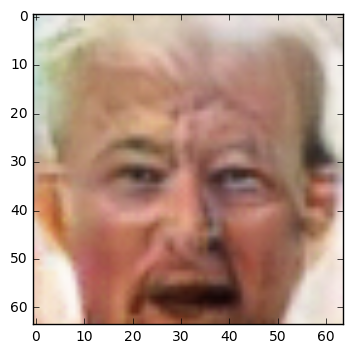

In [5]:
# inspect
im_idx = 3
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[im_idx, :]))

In [6]:
# clean up
sess.close()

# Apply discriminator
---


In [7]:
# define the graph
sess = tf.Session()
x_hat = tf.placeholder(tf.float32, shape = [1, 64*64*3], name='x_hat')
d_loss, restore_dict, restore_path = celebA_estimators.dcgan_discrim(x_hat, sess)

Instructions for updating:
Please use tf.global_variables instead.


In [8]:
# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

In [40]:
# apply on random images
for _ in range(10):
    x_hat_val = np.reshape(2*np.random.random((1, 64, 64, 3)) - 1, [1, -1])
    feed_dict = {x_hat: x_hat_val}
    d_loss_val = sess.run(d_loss, feed_dict=feed_dict)
    print np.exp(-d_loss_val)

[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 0.99984121]
[ 0.00014032]
[ 1.]
[ 1.]


In [41]:
# Get some real images

image_paths = glob.glob(os.path.join("../data", 'celebA', "*.jpg"))
image_paths.sort()
image_paths = image_paths[:64]
images = [dcgan_utils.get_image(image_path, 108) for image_path in image_paths]

In [42]:
# Apply on one image
im_idx = 12
x_hat_val = images[im_idx].reshape([1, -1])
feed_dict = {x_hat: x_hat_val}
d_loss_val = sess.run(d_loss, feed_dict=feed_dict)

[ 0.98568207]


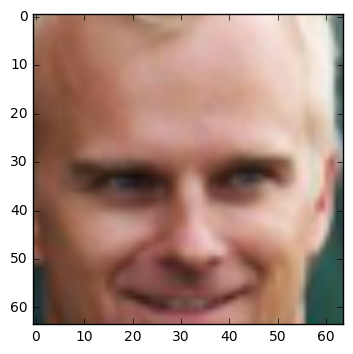

In [43]:
# inspect
plt.imshow(dcgan_utils.inverse_transform(images[im_idx]))
print np.exp(-d_loss_val)

In [44]:
# clean up
sess.close()